In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('final_day.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df.drop(['Close'],axis=1,inplace=True)
df.drop(['Time'],axis=1,inplace=True)



df['Target']=df['Target'].shift(1)
df['S&P Cryptocurrency LargeCap Ex-MegaCap Index (USD)']=np.log(df['S&P Cryptocurrency LargeCap Ex-MegaCap Index (USD)']).diff(1)
df['ETH']=np.log(df['ETH']).diff(1)
df['LTC']=np.log(df['LTC']).diff(1)
df['S&P US Dollar Futures Index TR']=np.log(df['S&P US Dollar Futures Index TR']).diff(1)
df['S&P GSCI Copper']=np.log(df['S&P GSCI Copper']).diff(1)
df['USD_Index']=np.log(df['USD_Index']).diff(1)
df['WTI Crude Oil']=np.log(df['WTI Crude Oil']).diff(1)
df['Brent Crude Oil']=np.log(df['Brent Crude Oil']).diff(1)
df['US Oil Fund ETF']=np.log(df['US Oil Fund ETF']).diff(1)
df['VIX_Adjclose']=np.log(df['VIX_Adjclose']).diff(1)
df['SPY_Adjclose']=np.log(df['SPY_Adjclose']).diff(1)
df['GLD_Adjclose']=np.log(df['GLD_Adjclose']).diff(1)

df.drop(0,inplace=True)
df.dropna(inplace=True)


train_set,test_set=train_test_split(df,test_size=0.1,shuffle=False)
x_train=train_set.drop(['Target'],axis=1)
y_train=train_set['Target']
x_test=test_set.drop(['Target'],axis=1)
y_test=test_set['Target']
x_train.head()


,S&P Cryptocurrency LargeCap Ex-MegaCap Index (USD),Volume,48_hour_vol,48_hour_std,48_upper_band_pct,48_mean_pct,48_lower_band_pct,OBV,Weekday,Is_Trading_Day,...,SnP Coper index Volatility,SnP Coper index Volatility BB_lower_norm,SnP Coper index Volatility BB_upper_norm,bitcoin_search,rates_search,FED_search,crisis_search,SnP Crypto index Volatility,SnP Crypto index Volatility BB_lower_norm,SnP Crypto index Volatility BB_upper_norm
1249,0.004088,26.234413,5.360465,1192.534294,0.453078,0.208587,-0.115721,84.793096,1,1,...,4.415583,0.980024,1.017206,18,17,4,6,13.526128,0.865176,1.600992
1250,0.088325,1.446525,5.564477,1092.267048,0.357923,0.128749,-0.169065,86.239621,2,1,...,3.792750,0.970417,1.001975,18,17,4,6,13.510808,0.776084,1.448933
1251,-0.086152,4.659491,5.631358,950.844274,0.396345,0.190536,-0.068907,81.580130,3,1,...,3.668597,0.981077,1.011931,18,17,4,6,12.790101,0.832684,1.526949
1252,-0.023479,27.830194,5.482780,881.027468,0.386077,0.191231,-0.050997,53.749936,4,1,...,3.837065,0.967496,0.999338,18,17,4,6,12.003791,0.841619,1.508682
1253,-0.040689,6.581033,5.245653,883.049793,0.399170,0.201712,-0.044575,47.168903,5,1,...,4.017304,0.974214,1.007786,18,17,4,6,11.547572,0.857689,1.526048


Linear Regression

In [ ]:
import toad
df_ols=df.dropna()
final_data = toad.selection.stepwise(df_ols,
                                     target='Target',
                                     estimator='ols', 
                                     direction = 'both', 
                                     criterion = 'aic'
                                     )


train_set_ols,test_set_ols=train_test_split(final_data,test_size=0.1,shuffle=False)
x_train_ols=train_set_ols.drop(['Target'],axis=1)
y_train_ols=train_set_ols['Target']
x_test_ols=test_set_ols.drop(['Target'],axis=1)
y_test_ols=test_set_ols['Target']
x_train_ols.head()

,S&P Cryptocurrency LargeCap Ex-MegaCap Index (USD),48_mean_pct,BTC_RSI_Signal,ETH,LTC,USD_Index,WTI Crude Oil,US Oil Fund ETF,S&P US Dollar Futures Index TR
1249,0.004088,0.208587,1,0.017801,0.034831,-0.001110,-0.030170,-0.027102,-0.001058
1250,0.088325,0.128749,1,0.075892,0.119650,0.001664,0.007904,0.005480,0.001790
1251,-0.086152,0.190536,1,-0.091230,-0.127171,-0.000665,-0.002207,0.000780,-0.000813
1252,-0.023479,0.191231,1,0.007041,0.006054,0.003544,0.002679,0.000780,0.004221
1253,-0.040689,0.201712,1,-0.034368,-0.051465,-0.003877,-0.023568,-0.025258,-0.004140


In [ ]:
import statsmodels.api as sm
x_train_ols=sm.add_constant(x_train_ols)
ols=sm.OLS(y_train_ols,x_train_ols).fit()
print(ols.summary())
x_train_ols.drop(['const'],axis=1,inplace=True)

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     295.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        18:39:31   Log-Likelihood:                 5005.8
No. Observations:                2142   AIC:                            -9992.
Df Residuals:                    2132   BIC:                            -9935.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train_ols,y_train_ols)
lr_pred=lr.predict(x_test_ols)
lr_pred=pd.Series(lr_pred)
lr_pred.index=y_test_ols.index
mse=mean_squared_error(y_test_ols,lr_pred)
print('mse:',mse)
mae=mean_absolute_error(y_test_ols,lr_pred)
print('mae:',mae)
r2=r2_score(y_test_ols,lr_pred)
print('r2_score:',r2)


result=pd.DataFrame(columns=['Model','MSE','MAE','R2'])
result.loc[0,'Model']='Linear Regression'
result.loc[0,'MSE']=mse
result.loc[0,'MAE']=mae
result.loc[0,'R2']=r2

mse: 0.0002719764624082522
mae: 0.012693791016065398
r2_score: 0.6496325726515044


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

importance=rf.feature_importances_
importance=pd.Series(importance,index=x_train.columns)
importance=importance.sort_values(ascending=False)
print(importance)

x_train=x_train[importance.index[:20]]
x_test=x_test[importance.index[:20]]

x_train.head()

ETH                                                   0.250721
S&P Cryptocurrency LargeCap Ex-MegaCap Index (USD)    0.248245
LTC                                                   0.101215
48_upper_band_pct                                     0.069394
48_hour_vol                                           0.026689
48_lower_band_pct                                     0.023455
Volume                                                0.019287
48_mean_pct                                           0.016715
SnP Crypto index Volatility BB_upper_norm             0.012907
SnP Crypto index Volatility BB_lower_norm             0.011420
BTC_Volume_MA                                         0.010030
SnP Dollar Future Volatility BB_upper_norm            0.009953
BTC_RSI                                               0.009949
SnP Coper index Volatility                            0.009707
VIX_Adjclose                                          0.009549
GLD_Adjclose                                          0

,ETH,S&P Cryptocurrency LargeCap Ex-MegaCap Index (USD),LTC,48_upper_band_pct,48_hour_vol,48_lower_band_pct,Volume,48_mean_pct,SnP Crypto index Volatility BB_upper_norm,SnP Crypto index Volatility BB_lower_norm,BTC_Volume_MA,SnP Dollar Future Volatility BB_upper_norm,BTC_RSI,SnP Coper index Volatility,VIX_Adjclose,GLD_Adjclose,SnP Dollar Future Volatility,SnP Crypto index Volatility,BTC_SMA_200,SnP Coper index Volatility BB_lower_norm
1249,0.017801,0.004088,0.034831,0.453078,5.360465,-0.115721,26.234413,0.208587,1.600992,0.865176,5.639226e+09,1.005985,26.805013,4.415583,0.167863,0.011618,0.575510,13.526128,9509.531909,0.980024
1250,0.075892,0.088325,0.119650,0.357923,5.564477,-0.169065,1.446525,0.128749,1.448933,0.776084,5.592300e+09,1.004953,28.718093,3.792750,-0.112821,-0.007572,0.595665,13.510808,9528.624858,0.970417
1251,-0.091230,-0.086152,-0.127171,0.396345,5.631358,-0.068907,4.659491,0.190536,1.526949,0.832684,5.497378e+09,1.005541,24.124274,3.668597,-0.050545,0.001187,0.586246,12.790101,9544.768857,0.981077
1252,0.007041,-0.023479,0.006054,0.386077,5.482780,-0.050997,27.830194,0.191231,1.508682,0.841619,5.514875e+09,1.002793,25.116567,3.837065,-0.057452,-0.005154,0.639080,12.003791,9560.911809,0.967496
1253,-0.034368,-0.040689,-0.051465,0.399170,5.245653,-0.044575,6.581033,0.201712,1.526048,0.857689,5.481909e+09,1.007369,21.061355,4.017304,0.126312,0.004679,0.647649,11.547572,9573.767408,0.974214


In [ ]:
def rf_cv(n_estimators,max_depth,min_samples_split,min_samples_leaf):
    rf=RandomForestRegressor(n_estimators=int(n_estimators),
                             max_depth=int(max_depth),
                             min_samples_split=int(min_samples_split),
                             min_samples_leaf=int(min_samples_leaf))
    rf.fit(x_train,y_train)
    
    return rf.score(x_test,y_test)

from bayes_opt import BayesianOptimization
rf_bo=BayesianOptimization(
    rf_cv,
    {
        'n_estimators':(10,50),
        'max_depth':(1,8),
        'min_samples_split':(2,10),
        'min_samples_leaf':(1,10)
    }
)

rf_bo.maximize(n_iter=50)
params=rf_bo.max['params']
params['n_estimators']=int(params['n_estimators'])
params['max_depth']=int(params['max_depth'])
params['min_samples_split']=int(params['min_samples_split'])
params['min_samples_leaf']=int(params['min_samples_leaf'])

rf=RandomForestRegressor(**params)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_pred=pd.Series(rf_pred)
rf_pred.index=y_test.index
mse=mean_squared_error(y_test,rf_pred)
print('mse:',mse)
mae=mean_absolute_error(y_test,rf_pred)
print('mae:',mae)
r2=r2_score(y_test,rf_pred)
print('r2_score:',r2)


result.loc[1,'Model']='RandomForest'
result.loc[1,'MSE']=mse
result.loc[1,'MAE']=mae
result.loc[1,'R2']=r2

|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | 0.628     | 3.397     | 7.467     | 7.705     | 22.38     |
| 2         | 0.5493    | 2.745     | 6.853     | 4.829     | 34.9      |
| 3         | 0.4205    | 1.727     | 6.359     | 9.547     | 48.81     |
| 4         | 0.568     | 2.479     | 4.138     | 5.023     | 39.72     |
| 5         | 0.7002    | 7.827     | 9.354     | 8.585     | 45.48     |
| 6         | 0.6921    | 7.904     | 7.737     | 7.562     | 47.75     |
| 7         | 0.6887    | 7.956     | 8.501     | 4.559     | 45.11     |
| 8         | 0.6818    | 7.714     | 8.726     | 2.318     | 49.19     |
| 9         | 0.6542    | 4.189     | 7.405     | 9.885     | 10.03     |
| 10        | 0.6684    | 4.594     | 1.402     | 2.846     | 11.71     |
| 11        | 0.6619    | 7.999     | 9.106     | 2.302     | 11.25     |
| 12        | 0.3572    | 1.177     | 

XGB

In [ ]:
import xgboost as xgb
from matplotlib import pyplot as plt

from bayes_opt import BayesianOptimization
def xgb_cv(n_estimators, max_depth, subsample,gamma,min_child_weight, colsample_bytree,learning_rate,eta,reg_lambda):
    model = xgb.XGBRegressor(objective='reg:squarederror',
                             learning_rate=learning_rate,
                             n_estimators=int(n_estimators),
                             max_depth=int(max_depth),
                             gamma=gamma,
                             min_child_weight=min_child_weight,
                             subsample=max(min(subsample, 1), 0),
                             colsample_bytree=max(min(colsample_bytree, 1), 0),
                             eta=eta,
                             reg_lambda=reg_lambda
                            )
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

xgb_bo = BayesianOptimization(xgb_cv, {'n_estimators': (100, 250),
                                       'max_depth': (3, 10),
                                       'gamma': (0, 0),
                                       'min_child_weight': (0.1, 1),
                                       'subsample': (0.5, 1),
                                       'colsample_bytree': (0.5, 1),
                                       'learning_rate':(0.01,0.5),
                                       'eta':(0.01,0.2),
                                       'reg_lambda':(0.01,0.05)
                                       })
xgb_bo.maximize(n_iter=100)
params = xgb_bo.max['params']
params['n_estimators'] = int(params['n_estimators'])
params['max_depth'] = int(params['max_depth'])
xgbr = xgb.XGBRegressor(objective='reg:squarederror', **params)

xgbr.fit(x_train, y_train)
xgb_pred = xgbr.predict(x_test)
xgb_pred=pd.Series(xgb_pred)
mse = mean_squared_error(y_test, xgb_pred)
r2=r2_score(y_test,xgb_pred,multioutput='variance_weighted')
mae=mean_absolute_error(y_test,xgb_pred)
print('mse:', mse)
print('mae:',mae)
print('r2_score:',r2)

result.loc[2,'Model']='XGB'
result.loc[2,'MSE']=mse
result.loc[2,'MAE']=mae
result.loc[2,'R2']=r2

|   iter    |  target   | colsam... |    eta    |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.2997    | 0.5106    | 0.1631    | 0.0       | 0.4015    | 5.602     | 0.3314    | 166.6     | 0.02626   | 0.5489    |
| 2         | 0.5777    | 0.6377    | 0.06952   | 0.0       | 0.4207    | 6.8       | 0.7345    | 178.3     | 0.01706   | 0.9033    |
| 3         | 0.5567    | 0.9427    | 0.03226   | 0.0       | 0.3284    | 8.672     | 0.415     | 231.2     | 0.01583   | 0.7342    |
| 4         | 0.5234    | 0.852     | 0.03996   | 0.0       | 0.2939    | 3.854     | 0.5167    | 166.6     | 0.01254   | 0.7406    |
| 5         | 0.4103    | 0.899     | 0.05299   | 0.0       | 0.4828    | 7.765     | 0.7443    | 100.7     | 0.02902   | 0.6208    |
| 6         | 0.5813    | 0.593     | 0.06422   | 0.0       | 

LGBM

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from bayes_opt import BayesianOptimization

def lgb_cv(n_estimators, max_depth, subsample, colsample_bytree, learning_rate, reg_lambda):
    model = LGBMRegressor(objective='regression',
                          n_estimators=int(n_estimators),
                          max_depth=int(max_depth),
                          subsample=max(min(subsample, 1), 0),
                          colsample_bytree=max(min(colsample_bytree, 1), 0),
                          learning_rate=learning_rate,
                          reg_lambda=reg_lambda
                          )
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

lgb_bo = BayesianOptimization(lgb_cv, {'n_estimators': (100, 250),
                                        'max_depth': (3, 4),
                                        'subsample': (0.5, 1),
                                        'colsample_bytree': (0.5, 1),
                                        'learning_rate': (0.01, 0.5),
                                        'reg_lambda': (0.01, 0.05)
                                        })
lgb_bo.maximize(n_iter=100)
params = lgb_bo.max['params']
params['n_estimators'] = int(params['n_estimators'])
params['max_depth'] = int(params['max_depth'])
lgbm = LGBMRegressor(objective='regression', **params)

lgbm.fit(x_train, y_train)
lgb_pred = lgbm.predict(x_test)
lgb_pred=pd.Series(lgb_pred)
mse = mean_squared_error(y_test, lgb_pred)
r2=r2_score(y_test,lgb_pred,multioutput='variance_weighted')
mae=mean_absolute_error(y_test,lgb_pred)
print('mse:', mse)
print('mae:',mae)
print('r2_score:',r2)

result.loc[3,'Model']='LGBM'
result.loc[3,'MSE']=mse
result.loc[3,'MAE']=mae
result.loc[3,'R2']=r2

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | reg_la... | subsample |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 2142, number of used features: 20
[LightGBM] [Info] Start training from score 0.001548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_svm_train=scaler.fit_transform(x_train)
x_svm_test=scaler.transform(x_test)

def svr_cv(C, epsilon, gamma):
    model = SVR(C=C, epsilon=epsilon, gamma=gamma)
    model.fit(x_svm_train, y_train)
    return model.score(x_svm_test, y_test)

svr_bo = BayesianOptimization(svr_cv, {'C': (0.1, 10),
                                        'epsilon': (0.01, 0.1),
                                        'gamma': (0.001, 0.1)
                                        })
svr_bo.maximize(n_iter=100)
params = svr_bo.max['params']
params['C'] = params['C']
svr = SVR(**params)
svr.fit(x_svm_train, y_train)
svr_pred = svr.predict(x_svm_test)
svr_pred=pd.Series(svr_pred)
mse = mean_squared_error(y_test, svr_pred)
r2=r2_score(y_test,svr_pred,multioutput='variance_weighted')
mae=mean_absolute_error(y_test,svr_pred)
print('mse:', mse)
print('mae:',mae)
print('r2_score:',r2)

result.loc[4,'Model']='SVM'
result.loc[4,'MSE']=mse
result.loc[4,'MAE']=mae
result.loc[4,'R2']=r2


|   iter    |  target   |     C     |  epsilon  |   gamma   |
-------------------------------------------------------------
| 1         | 0.4773    | 7.007     | 0.08393   | 0.03345   |
| 2         | 0.57      | 8.726     | 0.0629    | 0.04064   |
| 3         | 0.6016    | 6.118     | 0.06409   | 0.02597   |
| 4         | 0.2884    | 7.309     | 0.09476   | 0.05545   |
| 5         | 0.4611    | 7.771     | 0.05726   | 0.08751   |
| 6         | 0.2539    | 6.112     | 0.09917   | 0.05719   |
| 7         | 0.5039    | 2.573     | 0.02402   | 0.08338   |
| 8         | 0.2797    | 7.195     | 0.09576   | 0.05878   |
| 9         | 0.2409    | 9.499     | 0.09384   | 0.08226   |
| 10        | 0.5663    | 2.186     | 0.04716   | 0.02912   |
| 11        | 0.5125    | 4.796     | 0.03232   | 0.08313   |
| 12        | 0.6026    | 4.343     | 0.05949   | 0.02021   |
| 13        | 0.5029    | 9.265     | 0.02572   | 0.09724   |
| 14        | 0.2904    | 1.12      | 0.09424   | 0.05699   |
| 15    

LSTM

Epoch 1/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0023 - val_loss: 4.9615e-04
Epoch 2/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0015 - val_loss: 4.7755e-04
Epoch 3/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.7025e-04
Epoch 4/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0014 - val_loss: 4.6241e-04
Epoch 5/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.5768e-04
Epoch 6/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.4910e-04
Epoch 7/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.5298e-04
Epoch 8/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.5182e-04
Epoch 9/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.4810e-04
Epoch 10/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0014 - val_loss: 4.4863e-04
Epoch 11/600
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0013 - val_loss: 4.4721e-

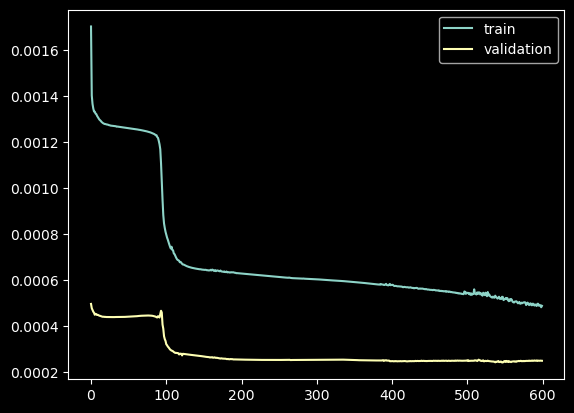

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
mse: 0.0002810633631651283
mae: 0.012711235630913026
r2_score: 0.6379265815794579


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout ,Attention, RepeatVector, Concatenate,Activation,Bidirectional
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


x_lstm_train=x_train.values.reshape(x_train.shape[0],x_train.shape[1],1)
y_train_lstm=y_train.values
x_lstm_test=x_test.values.reshape(x_test.shape[0],x_test.shape[1],1)
y_test_lstm=y_test.values

model=Sequential()
model.add(LSTM(units=64,return_sequences=True,input_shape=(x_lstm_train.shape[1],x_lstm_train.shape[2]),kernel_initializer=keras.initializers.RandomUniform(seed=327)))
model.add(LSTM(units=32,kernel_initializer=keras.initializers.RandomUniform(seed=327)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
model.compile(loss='mse',optimizer=optimizer)
history=model.fit(x_lstm_train,y_train_lstm,epochs=600,batch_size=4,validation_split=0.1,shuffle=False)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()


lstm_pred=model.predict(x_lstm_test)
lstm_pred=pd.Series(lstm_pred.reshape(-1))
mse=mean_squared_error(y_test_lstm,lstm_pred)
r2=r2_score(y_test_lstm,lstm_pred)
mae=mean_absolute_error(y_test_lstm,lstm_pred)
print('mse:',mse)
print('mae:',mae)
print('r2_score:',r2)


result.loc[5,'Model']='LSTM'
result.loc[5,'MSE']=mse
result.loc[5,'MAE']=mae
result.loc[5,'R2']=r2

Attention BiLSTM

Epoch 1/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.0105 - val_loss: 4.3845e-04
Epoch 2/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0016 - val_loss: 3.8815e-04
Epoch 3/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0012 - val_loss: 3.6121e-04
Epoch 4/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.4951e-04 - val_loss: 3.4705e-04
Epoch 5/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.4342e-04 - val_loss: 3.3734e-04
Epoch 6/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.9650e-04 - val_loss: 3.2465e-04
Epoch 7/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.7117e-04 - val_loss: 3.1577e-04
Epoch 8/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.5927e-04 - val_loss: 3.0795e-04
Epoch 9/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.4524e-04 - val_loss: 3.0395e-04
Epoch 10/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.3661e-04 - val_loss: 3.0233e-04
Epoch 11/500
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss

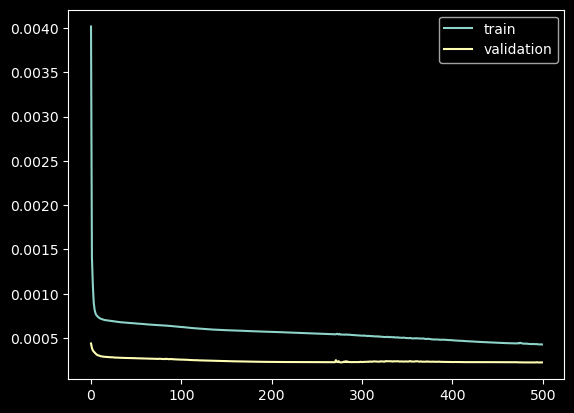

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
mse: 0.00025472051806062267
mae: 0.011975774448791181
r2_score: 0.6718621463948106


In [ ]:
bilstm=Sequential()
bilstm.add(Bidirectional(LSTM(units=64,return_sequences=True),input_shape=(x_lstm_train.shape[1],x_lstm_train.shape[2])))
bilstm.add(Bidirectional(LSTM(units=32)))
bilstm.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6)
bilstm.compile(loss='mse',optimizer=optimizer)
history=bilstm.fit(x_lstm_train,y_train_lstm,epochs=500,batch_size=4,validation_split=0.1,shuffle=False)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

lstm_pred=bilstm.predict(x_lstm_test)
lstm_pred=pd.Series(lstm_pred.reshape(-1))
mse=mean_squared_error(y_test_lstm,lstm_pred)
r2=r2_score(y_test_lstm,lstm_pred)
mae=mean_absolute_error(y_test_lstm,lstm_pred)
print('mse:',mse)
print('mae:',mae)
print('r2_score:',r2)

result.loc[6,'Model']='BiLSTM'
result.loc[6,'MSE']=mse
result.loc[6,'MAE']=mae
result.loc[6,'R2']=r2

In [327]:
result

,Model,MSE,MAE,R2
0,Linear Regression,0.000272,0.012694,0.649633
1,RandomForest,0.000237,0.01167,0.694908
2,XGB,0.000226,0.011315,0.709185
3,LGBM,0.000225,0.011267,0.7097
4,SVM,0.000226,0.011381,0.708674
5,LSTM,0.000281,0.012711,0.637927
6,BiLSTM,0.000255,0.011976,0.671862


Buy and hold strategy according to the result of XGB

In [ ]:
df=pd.read_csv('final_day.csv')
time=df['Time']



time=time[3393:3632]
time=pd.DataFrame(time)

y_test=pd.DataFrame(y_test)
bh=time.merge(y_test,left_on=time.index,right_on=y_test.index)

pred=pd.DataFrame(xgb_pred)
bh=bh.merge(pred,left_index=True,right_index=True)
bh.columns=['index','Time','True','Predict']
bh

,index,Time,True,Predict
0,3393,2024/2/15,0.048568,0.027826
1,3394,2024/2/16,0.009536,0.009623
2,3395,2024/2/17,0.000231,0.003419
3,3396,2024/2/18,-0.013540,0.002917
4,3397,2024/2/19,0.010314,0.009280
...,...,...,...,...
234,3627,2024/10/25,0.012394,0.000265
235,3628,2024/10/27,-0.017520,-0.016727
236,3629,2024/10/29,0.043917,0.017522
237,3630,2024/10/31,0.034164,0.024592


In [ ]:
bh['Predict']=bh['Predict'].apply(lambda x:1 if x>0 else 0)
ret=sum(bh['Predict']*bh['True'])
print("The return of one-day buy&hold strategy is:",ret)

The return of one-day buy&hold strategy is: 2.461872541
